In [36]:
import pandas as pd
import numpy as np 
import os

import matplotlib.pyplot as plt
import matplotlib.cm 
import matplotlib.colors
from matplotlib.patches import Patch
plt.rcParams['font.family'] = 'Arial'

from selenobot.files import FASTAFile
from selenobot.classifiers import Classifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import re
from tqdm import tqdm 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
feature_types = ['len', 'aa_1mer', 'plm_esm_cls', 'plm_esm_log', 'plm_esm_gap', 'plm_pt5']
color_map = {'val.':'tab:blue', 'test':'tab:red'}

preds = dict()

test_pred_df = pd.read_csv('../data/results/2c_test.predict.csv', index_col=0)
val_pred_df = pd.read_csv('../data/results/2c_val.predict.csv', index_col=0)

In [27]:
def plot_accuracy(feature_types:list, ax:plt.Axes=None, sep:float=0.02):
    
    accs = dict()
    accs['val.'] = [balanced_accuracy_score(val_pred_df.label.values, val_pred_df[f'model_2c_{f}_prediction'].values) for f in feature_types]
    accs['test'] = [balanced_accuracy_score(test_pred_df.label.values, test_pred_df[f'model_2c_{f}_prediction'].values) for f in feature_types]
    
    positions = np.arange(len(feature_types))

    bar_width = 0.4
    ax.set_xticks(positions + (bar_width / 2), labels=feature_types, rotation=45)
    ax.set_ylabel('balanced accuracy')
    
    i = 0
    for dataset, acc in accs.items():
        ax.bar(positions + i * (bar_width + sep), acc, width=bar_width, color=color_map[dataset], edgecolor='black', lw=0.7, label=f'{dataset} acc.')
        i += 1

    ax.legend(loc='lower right')

In [30]:
# Does re-adding a length token rescue the performance of the CLS-based classifier?

# fig, ax = plt.subplots(figsize=(5, 3))
# plot_balanced_accuracy(['plm_esm_cls', 'plm_esm_cls_add_length_feature'], ax)
# plt.show()

# fig, ax = plt.subplots(figsize=(5, 3))
# plot_balanced_accuracy(['plm_esm_log', 'plm_esm_log_aa_tokens_only'], ax)
# plt.show()


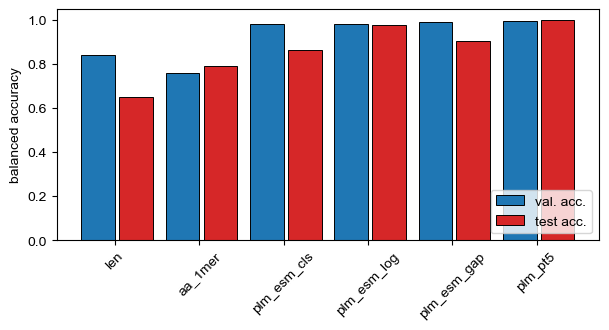

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_accuracy(feature_types, ax=ax, sep=0.05)
plt.show()


In [79]:
# I should take a look at the training curves and make sure nothing is underfitting, particularly because the ESM model
# has twice as many features...

def plot_training_curve(model_name:str, ax:plt.Axes=None):

    model = Classifier.load(f'../models/{model_name}.pkl')

    x = np.arange(100)
    ax.plot(x, model.model.val_accs[1:], color='tab:blue')
    ax.vlines([model.model.best_epoch], ymin=ax.get_ylim()[0], ymax=1, color='black', ls='--', lw=0.5)
    ax.text(model.model.best_epoch, 1, f'{model.model.best_epoch}', ha='center')

    right_ax = ax.twinx()
    right_ax.plot(x, model.model.train_losses, color='gray')

    ax.set_title(model_name + ' training curve')
    ax.set_ylabel('balanced accuracy')
    right_ax.set_ylabel('weighted CE loss')
    handles = [Patch(facecolor='tab:blue', edgecolor='black', label='val. acc.'), Patch(facecolor='gray', edgecolor='black', label='train. loss.')]
    ax.legend(handles=handles)

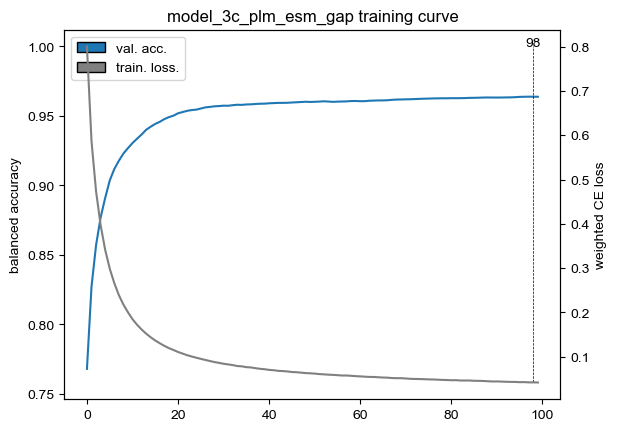

In [85]:
fig, ax = plt.subplots()
plot_training_curve(model_name=model_name.replace('.pkl', ''), ax=ax)
plt.show()

In [50]:
os.listdir('../models')

['model_2c_plm_esm_log_aa_tokens_only.pkl',
 'model_2c_plm_esm_cls.pkl',
 'model_2c_plm_esm_gap.pkl',
 'model_2c_plm_pt5.pkl',
 'model_2c_len.pkl',
 'model_2c_plm_esm_cls_add_length_feature.pkl',
 'model_2c_aa_1mer.pkl',
 'model_2c_plm_esm_log.pkl']